# Enfermedades infecciosas y ecuaciones diferenciales no lineales

##### Sergio Andrés Jiménez Jerez, Código 2208059.

Sobre este tema expuesto, vamos a modelar las siguientes ecuaciones 

<div style="text-align: center">  $\frac {dS}{dt}= - \beta IS$ </div>
<div style="text-align: center">  $\frac {dR}{dt}=  \gamma I$ </div>
<div style="text-align: center">  $\frac {dI}{dt}=  \beta IS - \gamma I$, </div>

las cuales se trataron y entendemos que $\gamma$ y $\beta$, son las tasas de recuperación e infección respectivamente, $S, R, I$ son la cantidad de población que se encuentra Suceptible, Recuperada e Infectada, 
ademas agregaremos la opción de muertos para los cuales tendremos el siguiente sistema de ecuaciones

<div style="text-align: center">  $\frac {dS}{dt}= - \beta IS$ </div>
<div style="text-align: center">  $\frac {dR}{dt}=  (\gamma I)*(1-\rho)$ </div>
<div style="text-align: center">  $\frac {dI}{dt}=  \beta IS - \gamma I$, </div>
<div style="text-align: center">  $\frac {dM}{dt}=  (\gamma I)*\rho$ </div>

Donde el $M$ nos indica que cantidad de la población muere y $\rho$ la taza de muerte la cual no la dejaremos fija, mas adelante hablaremos mas de eso. 

Al comparar estas ecuaciones con las primeras solo afectamos a la población de recuperados ya que la dividimos en dos partes quellos que si llegan a recuperarse y aquellos que mueren.

Para el cual suponiendo siempre una población de $1$, esta población la dividimos en dos, dejaremos a la población suceptible $S=0.95$ y a la población infectada en $I=0.05$.
Para el cual se va a dividir en dos faces la primera se hace solo una grafica de las primeras ecuaciones para entender un poco mas y ya en la segunda como ya se menciono se le agrega un factor $M$ el cual haremos mas graficas para poder ver como se comporto mas los valores de $\gamma$ y $\beta$.

#### Fase 1

Para esta primera fase como ya se menciono para ver como se comporta estas escuaciones dejaremos un valor fijo de $\gamma=0.3$ y $\beta=0.5$.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import matplotlib.gridspec as gridspec

In [30]:
def grafica(times, I, R, S):
    
    """
    Esta funcion grafica los valores de las listas I,R y S.
    """
    
    plt.figure()
    plt.plot(times, I, 'r', label = 'Infectados')
    plt.plot(times, R, 'g', label = 'Recuperados')
    plt.plot(times, S, 'b', label = 'Susceptibles')
    plt.xlabel('Días')
    plt.ylabel('Población')
    plt.title('SIR')
    plt.legend()
    plt.show()
    

def new(beta,gamma,R,I,S,dt):
    """
    Esta funcion genera un listado de valores para las variables poblacion de  R (Recuperados),
    I (Infectados) y S (Susceptible), del sistema de ecuaciones que ya se ha mencionado previamente,
    para ello se pide los valores de beta, gamma y datos iniciales de las variables R, I, S y un dt 
    que nos indicara la partición del espacio.    
    """
    dR = (gamma*I)*dt
    dS = (-beta*I*S)*dt
    R_new = R + dR
    S_new = S + dS
    I_new = 1 -S_new - R_new
    return R_new, S_new, I_new    

def principal(beta, gamma, tmax, dt):
    """
    Esta funcion genera las listas de I,R y S, para las cuales las completa y llama a la función grafica. 
    """
    I = [0.05]
    R = [0]
    S = [0.95]
    times = np.arange(0, tmax+dt, dt)
    
    for i in range(times.size-1):
        R_new, S_new, I_new = new(beta,gamma,R[i],I[i],S[i],dt)
        R.append(R_new)
        S.append(S_new)
        I.append(I_new)
    grafica(times, I, R, S)
    


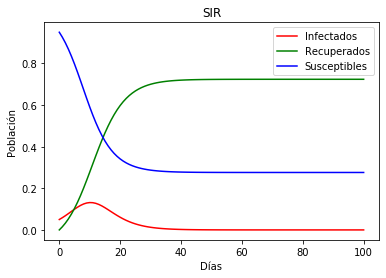

In [31]:
principal(0.5, 0.3, 100, 1)

#### Fase 2

Para esta fase complementaremos usando lo de la primera fase vamos a crear una probabilidad $\rho$ entre $0.01$ a $0.3$, el cual nos dara la taza de muertes en cada paso del tiempo.

In [37]:
def grafica2(times, I, R, S, M):
    
    """
    Esta funcion grafica los valores de las listas I, R, S y M.
    """
    
    plt.figure()
    plt.plot(times, I, 'r', label = 'Infectados')
    plt.plot(times, R, 'g', label = 'Recuperados')
    plt.plot(times, S, 'b', label = 'Susceptibles')
    plt.plot(times, M, 'k', label = 'Muertos')
    plt.xlabel('Días')
    plt.ylabel('Población')
    plt.title('SIRM')
    plt.legend()
    plt.show()
    

def new2(beta,gamma,R,I,S,M,dt):
    """
    Esta funcion genera un listado de valores para las variables poblacion de R (Recuperados), I (Infectados), 
    S (Susceptible) y M (Muertos) del sistema de ecuaciones que ya se ha mencionado previamente,
    para ello se pide los valores de beta, gamma y datos iniciales de las variables R, I, S, M, y un dt 
    que nos indicara la partición del espacio.      
    """
    a=random(size=1)/10        #Generamos /rho para cada iteración
    for i in a:
        rho=i+0.1
    
    dR = (gamma*I)*dt*(1-rho)    #Disminuimos toda la población de recuperados en un porcentaje de (1-rho)
    dM = (gamma*I)*dt*rho        #Hacemos la parte de población de recuperados que mueren para un porcentaje rho
    dS = (-beta*I*S)*dt
    R_new = R + dR
    S_new = S + dS
    M_new = M +dM
    I_new = 1 -S_new - R_new - M_new
    return R_new, S_new, I_new, M_new   

def principal2(beta, gamma, tmax, dt):
    """
    Esta funcion genera las listas de I, R, S y M, para las cuales las completa y llama a la función grafica2.
    """
    I = [0.05]
    R = [0]
    S = [0.95]
    M = [0]
    times = np.arange(0, tmax+dt, dt)
    
    for i in range(times.size-1):
        R_new, S_new, I_new, M_new = new2(beta,gamma,R[i],I[i],S[i],M[i],dt)
        R.append(R_new)
        S.append(S_new)
        I.append(I_new)
        M.append(M_new)
    grafica2(times, I, R, S, M)
    

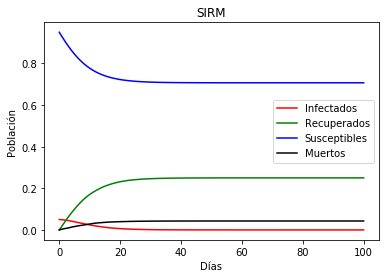

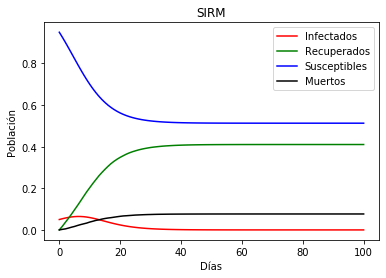

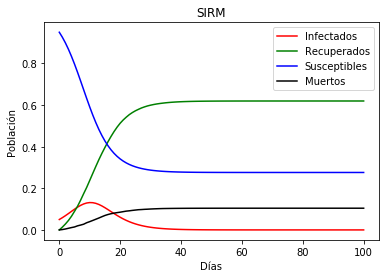

In [38]:
principal2(0.5, 0.5, 100, 1)

principal2(0.5, 0.4, 100, 1)

principal2(0.5, 0.3, 100, 1)

Como podemos observar a medida que disminuye $\gamm$, aumentan el numero de infectados.

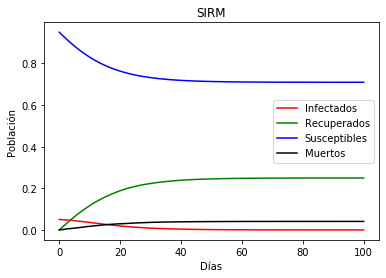

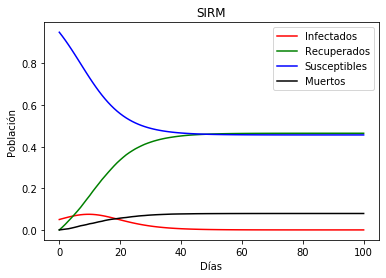

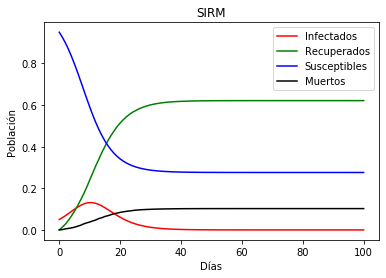

In [39]:
principal2(0.3, 0.3, 100, 1)

principal2(0.4, 0.3, 100, 1)

principal2(0.5, 0.3, 100, 1)

En este caso observamos que a medida que aumenta el $\beta$ la cantidad de infectados sigue aunmentando.

Si consideramos la razon: $R_0 = \frac{\beta}{\gamma}$, nos damos cuenta que esta taza de infectados viene dada por esta relación dado que si el $R_0$ aumenta esta taza debe aumentar, notemos que para que el $R_0$ aumente, el $\beta$ debe aumentar o el $\gamma$ debe disminuir, así que el efecto de crecimiento de los infectados se debe a esta taza $R_0$